<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/regressao_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#getting the data files from my github repository
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-04-09 17:50:44--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]   1.33M  --.-KB/s    in 0.08s   

2022-04-09 17:50:45 (16.4 MB/s) - ‘train.csv.1’ saved [1397869/1397869]

--2022-04-09 17:50:45--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text

In [3]:
# reading the training file
dfTrain = pd.read_csv('train.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [4]:
#descriptive statistics of variables
dfTrain.describe()

Id        score           V3           V4           V5  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean   2940.652499    29.121340     0.006104     0.000044     0.002964   
std    1699.192364    10.755535     0.005490     0.000035     0.003076   
min       1.000000     7.000000     0.000830     0.000002     0.000330   
25%    1475.000000    21.371000     0.003600     0.000023     0.001590   
50%    2946.000000    27.630000     0.004900     0.000035     0.002250   
75%    4415.000000    36.483000     0.006770     0.000053     0.003270   
max    5873.000000    54.992000     0.099990     0.000446     0.057540   

                V6           V7           V8           V9          V10  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.003245     0.008893     0.034051     0.311054     0.017160   
std       0.003616     0.009229     0.025476     0.227168     0.013016   
min       0.000430     0.000980     0.003060     0.026000     0.001610   
25%       0.001830     0.004780     0.019260     0.177000     0.009310   
50%       0.002480     0.006760     0.027750     0.255000     0.013770   
75%       0.003430     0.009800     0.039990     0.366000     0.020690   
max       0.069560     0.172630     0.239150     1.970000     0.162670   

               V11          V12          V13          V14          V15  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.020166     0.027513     0.051478     0.031895    21.691668   
std       0.016394     0.019818     0.039049     0.057913     4.283338   
min       0.001940     0.002490     0.004840     0.000286     1.659000   
25%       0.010820     0.015620     0.027930     0.011063    19.407000   
50%       0.016080     0.022960     0.041300     0.018663    21.915000   
75%       0.024000     0.032920     0.062070     0.031547    24.476000   
max       0.162460     0.275460     0.488020     0.748260    37.875000   

               V16          V17          V18          V19          V20  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.541286     0.653501     0.219475     0.010223    -0.012633   
std       0.101635     0.070514     0.089927     1.022667     1.001635   
min       0.151020     0.514040     0.021983    -3.368797    -3.380800   
25%       0.469290     0.597100     0.157740    -0.695530    -0.686830   
50%       0.542300     0.645100     0.206200     0.012535    -0.016551   
75%       0.614110     0.710790     0.264070     0.706236     0.656291   
max       0.966080     0.865600     0.731730     4.051689     3.521048   

               V21          V22          V23          V24          V25  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean     -0.025192    -0.000963     0.014772     0.008972    -0.007462   
std       1.000682     1.008123     0.989822     0.996655     0.988960   
min      -3.478111    -3.477503    -3.640632    -4.101566    -3.325202   
25%      -0.710558    -0.684078    -0.653262    -0.667845    -0.677333   
50%      -0.041247     0.010535     0.019838     0.012707    -0.014778   
75%       0.660537     0.662715     0.676001     0.678279     0.649582   
max       4.089038     3.415772     3.771027     3.904879     3.628111   

               V26          V27          V28          V29  
count  4141.000000  4141.000000  4141.000000  4141.000000  
mean     -0.016772    -0.000486    -0.005106    -0.018972  
std       1.026635     1.000286     0.990513     1.003466  
min      -4.181709    -3.271369    -3.914810    -3.940039  
25%      -0.710010    -0.684800    -0.667930    -0.719007  
50%      -0.022363    -0.017580    -0.020160    -0.018618  
75%       0.657142     0.643342     0.641950     0.659158  
max       4.551681     3.833876     3.459594     3.540049

In [5]:
#getting a vector of independents variables named preditoras.
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X_treino = dfTrain[preditoras].values
y_treino = dfTrain['score'].values


In [9]:
#selecting variables by KBest method. 
#Selected as variables with the highest k score. (calculates the p-value of each and returns the smallest p-values)


# feature selection
def select_features(X_treino, y_treino):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_treino, y_treino)
  # transform treino input data
	X_treino_fs = fs.transform(X_treino)
	return X_treino_fs, fs


Feature 0: 0.077146
Feature 1: 0.123274
Feature 2: 0.070391
Feature 3: 0.086769
Feature 4: 0.072166
Feature 5: 0.109912
Feature 6: 0.099487
Feature 7: 0.088907
Feature 8: 0.111373
Feature 9: 0.102421
Feature 10: 0.088637
Feature 11: 0.074755
Feature 12: 0.104346
Feature 13: 0.085647
Feature 14: 0.213802
Feature 15: 0.096335
Feature 16: 0.000000
Feature 17: 0.004916
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.011478
Feature 21: 0.000392
Feature 22: 0.000000
Feature 23: 0.001718
Feature 24: 0.000000
Feature 25: 0.022868
Feature 26: 0.000000


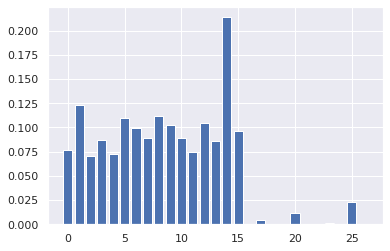

In [10]:
#call the function select_features
X_treino_fs, fs = select_features(X_treino, y_treino)

# what are scores for the features (list the score of each feature)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [11]:
#get the 15 most important variable
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes ]


In [12]:
def imprimeBoxPlot(dfTrain, n_preditoras:list, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [13]:
#removing the outliers using quantile measure
dados = dfTrain.copy()
for c in n_preditoras:
  Q1 = dados[c].quantile(0.25)
  Q3 = dados[c].quantile(0.75)
  IQR = Q3 - Q1
  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [14]:
#pearson and spearman correlation
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

V21       V20        V3       V13       V16        V6       V10  \
V21  1.000000  0.009525  0.001280 -0.003430 -0.002255  0.004533 -0.003422   
V20  0.009525  1.000000 -0.008907  0.018636  0.026069 -0.015338  0.018635   
V3   0.001280 -0.008907  1.000000  0.449355  0.394388  0.930170  0.449359   
V13 -0.003430  0.018636  0.449355  1.000000  0.294693  0.500037  1.000000   
V16 -0.002255  0.026069  0.394388  0.294693  1.000000  0.363796  0.294709   
V6   0.004533 -0.015338  0.930170  0.500037  0.363796  1.000000  0.500043   
V10 -0.003422  0.018635  0.449359  1.000000  0.294709  0.500043  1.000000   
V18 -0.004786  0.005023  0.755070  0.423107  0.425846  0.755890  0.423120   
V9  -0.006966  0.018851  0.517483  0.951366  0.338569  0.548662  0.951368   
V12 -0.009703  0.019970  0.464280  0.865214  0.375868  0.507849  0.865217   
V15  0.000560 -0.018815 -0.626546 -0.677567 -0.552688 -0.674504 -0.677568   
V8  -0.005345  0.019428  0.488156  0.979336  0.351867  0.531906  0.979338   
V11 -0.005924  0.018902  0.449261  0.972415  0.326101  0.509070  0.972416   
V4   0.006288 -0.006028  0.844021  0.417718  0.532171  0.811272  0.417724   
V17 -0.006356 -0.026056  0.413573  0.197679  0.132284  0.475741  0.197682   

          V18        V9       V12       V15        V8       V11        V4  \
V21 -0.004786 -0.006966 -0.009703  0.000560 -0.005345 -0.005924  0.006288   
V20  0.005023  0.018851  0.019970 -0.018815  0.019428  0.018902 -0.006028   
V3   0.755070  0.517483  0.464280 -0.626546  0.488156  0.449261  0.844021   
V13  0.423107  0.951366  0.865214 -0.677567  0.979336  0.972415  0.417718   
V16  0.425846  0.338569  0.375868 -0.552688  0.351867  0.326101  0.532171   
V6   0.755890  0.548662  0.507849 -0.674504  0.531906  0.509070  0.811272   
V10  0.423120  0.951368  0.865217 -0.677568  0.979338  0.972416  0.417724   
V18  1.000000  0.507506  0.519637 -0.637846  0.482693  0.460924  0.703243   
V9   0.507506  1.000000  0.921238 -0.678412  0.979142  0.960342  0.477640   
V12  0.519637  0.921238  1.000000 -0.677867  0.935156  0.929694  0.476588   
V15 -0.637846 -0.678412 -0.677867  1.000000 -0.699238 -0.693211 -0.641402   
V8   0.482693  0.979142  0.935156 -0.699238  1.000000  0.985805  0.467186   
V11  0.460924  0.960342  0.929694 -0.693211  0.985805  1.000000  0.449901   
V4   0.703243  0.477640  0.476588 -0.641402  0.467186  0.449901  1.000000   
V17  0.383993  0.198496  0.253649 -0.327871  0.225309  0.235543  0.463790   

          V17  
V21 -0.006356  
V20 -0.026056  
V3   0.413573  
V13  0.197679  
V16  0.132284  
V6   0.475741  
V10  0.197682  
V18  0.383993  
V9   0.198496  
V12  0.253649  
V15 -0.327871  
V8   0.225309  
V11  0.235543  
V4   0.463790  
V17  1.000000

V21       V20        V3       V13       V16        V6       V10  \
V21  1.000000  0.014147  0.005765 -0.006467 -0.004786  0.007518 -0.006452   
V20  0.014147  1.000000  0.005043  0.036132  0.031768  0.001386  0.036130   
V3   0.005765  0.005043  1.000000  0.500401  0.400524  0.934231  0.500401   
V13 -0.006467  0.036132  0.500401  1.000000  0.288585  0.557667  1.000000   
V16 -0.004786  0.031768  0.400524  0.288585  1.000000  0.370992  0.288595   
V6   0.007518  0.001386  0.934231  0.557667  0.370992  1.000000  0.557668   
V10 -0.006452  0.036130  0.500401  1.000000  0.288595  0.557668  1.000000   
V18  0.000258  0.012181  0.776098  0.462099  0.423623  0.773125  0.462106   
V9  -0.003639  0.035554  0.564614  0.952802  0.333571  0.596451  0.952807   
V12 -0.006095  0.040190  0.515922  0.885153  0.390376  0.559362  0.885155   
V15 -0.003306 -0.031556 -0.666401 -0.698836 -0.548584 -0.716682 -0.698834   
V8  -0.004674  0.037444  0.538216  0.977904  0.349515  0.584034  0.977906   
V11 -0.006630  0.037223  0.504262  0.977110  0.322801  0.566984  0.977111   
V4   0.005944  0.009647  0.858130  0.460632  0.541391  0.831819  0.460637   
V17 -0.010095 -0.021406  0.410338  0.220142  0.134756  0.471331  0.220163   

          V18        V9       V12       V15        V8       V11        V4  \
V21  0.000258 -0.003639 -0.006095 -0.003306 -0.004674 -0.006630  0.005944   
V20  0.012181  0.035554  0.040190 -0.031556  0.037444  0.037223  0.009647   
V3   0.776098  0.564614  0.515922 -0.666401  0.538216  0.504262  0.858130   
V13  0.462099  0.952802  0.885153 -0.698836  0.977904  0.977110  0.460632   
V16  0.423623  0.333571  0.390376 -0.548584  0.349515  0.322801  0.541391   
V6   0.773125  0.596451  0.559362 -0.716682  0.584034  0.566984  0.831819   
V10  0.462106  0.952807  0.885155 -0.698834  0.977906  0.977111  0.460637   
V18  1.000000  0.540631  0.553392 -0.652578  0.520358  0.499980  0.715173   
V9   0.540631  1.000000  0.931279 -0.696058  0.981268  0.963877  0.520542   
V12  0.553392  0.931279  1.000000 -0.708282  0.948995  0.942965  0.530561   
V15 -0.652578 -0.696058 -0.708282  1.000000 -0.718237 -0.714122 -0.674515   
V8   0.520358  0.981268  0.948995 -0.718237  1.000000  0.987430  0.511592   
V11  0.499980  0.963877  0.942965 -0.714122  0.987430  1.000000  0.493729   
V4   0.715173  0.520542  0.530561 -0.674515  0.511592  0.493729  1.000000   
V17  0.374036  0.215116  0.266093 -0.326127  0.242297  0.248797  0.476503   

          V17  
V21 -0.010095  
V20 -0.021406  
V3   0.410338  
V13  0.220142  
V16  0.134756  
V6   0.471331  
V10  0.220163  
V18  0.374036  
V9   0.215116  
V12  0.266093  
V15 -0.326127  
V8   0.242297  
V11  0.248797  
V4   0.476503  
V17  1.000000

In [15]:
#removing variables with high correlation (greater than 0.9)
dados_corr = dados[n_preditoras].corr('pearson')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)
n_preditoras = [c for c in n_preditoras if not c in retirar]
n_preditoras

['V21',
 'V20',
 'V16',
 'V6',
 'V10',
 'V18',
 'V9',
 'V15',
 'V8',
 'V11',
 'V4',
 'V17']

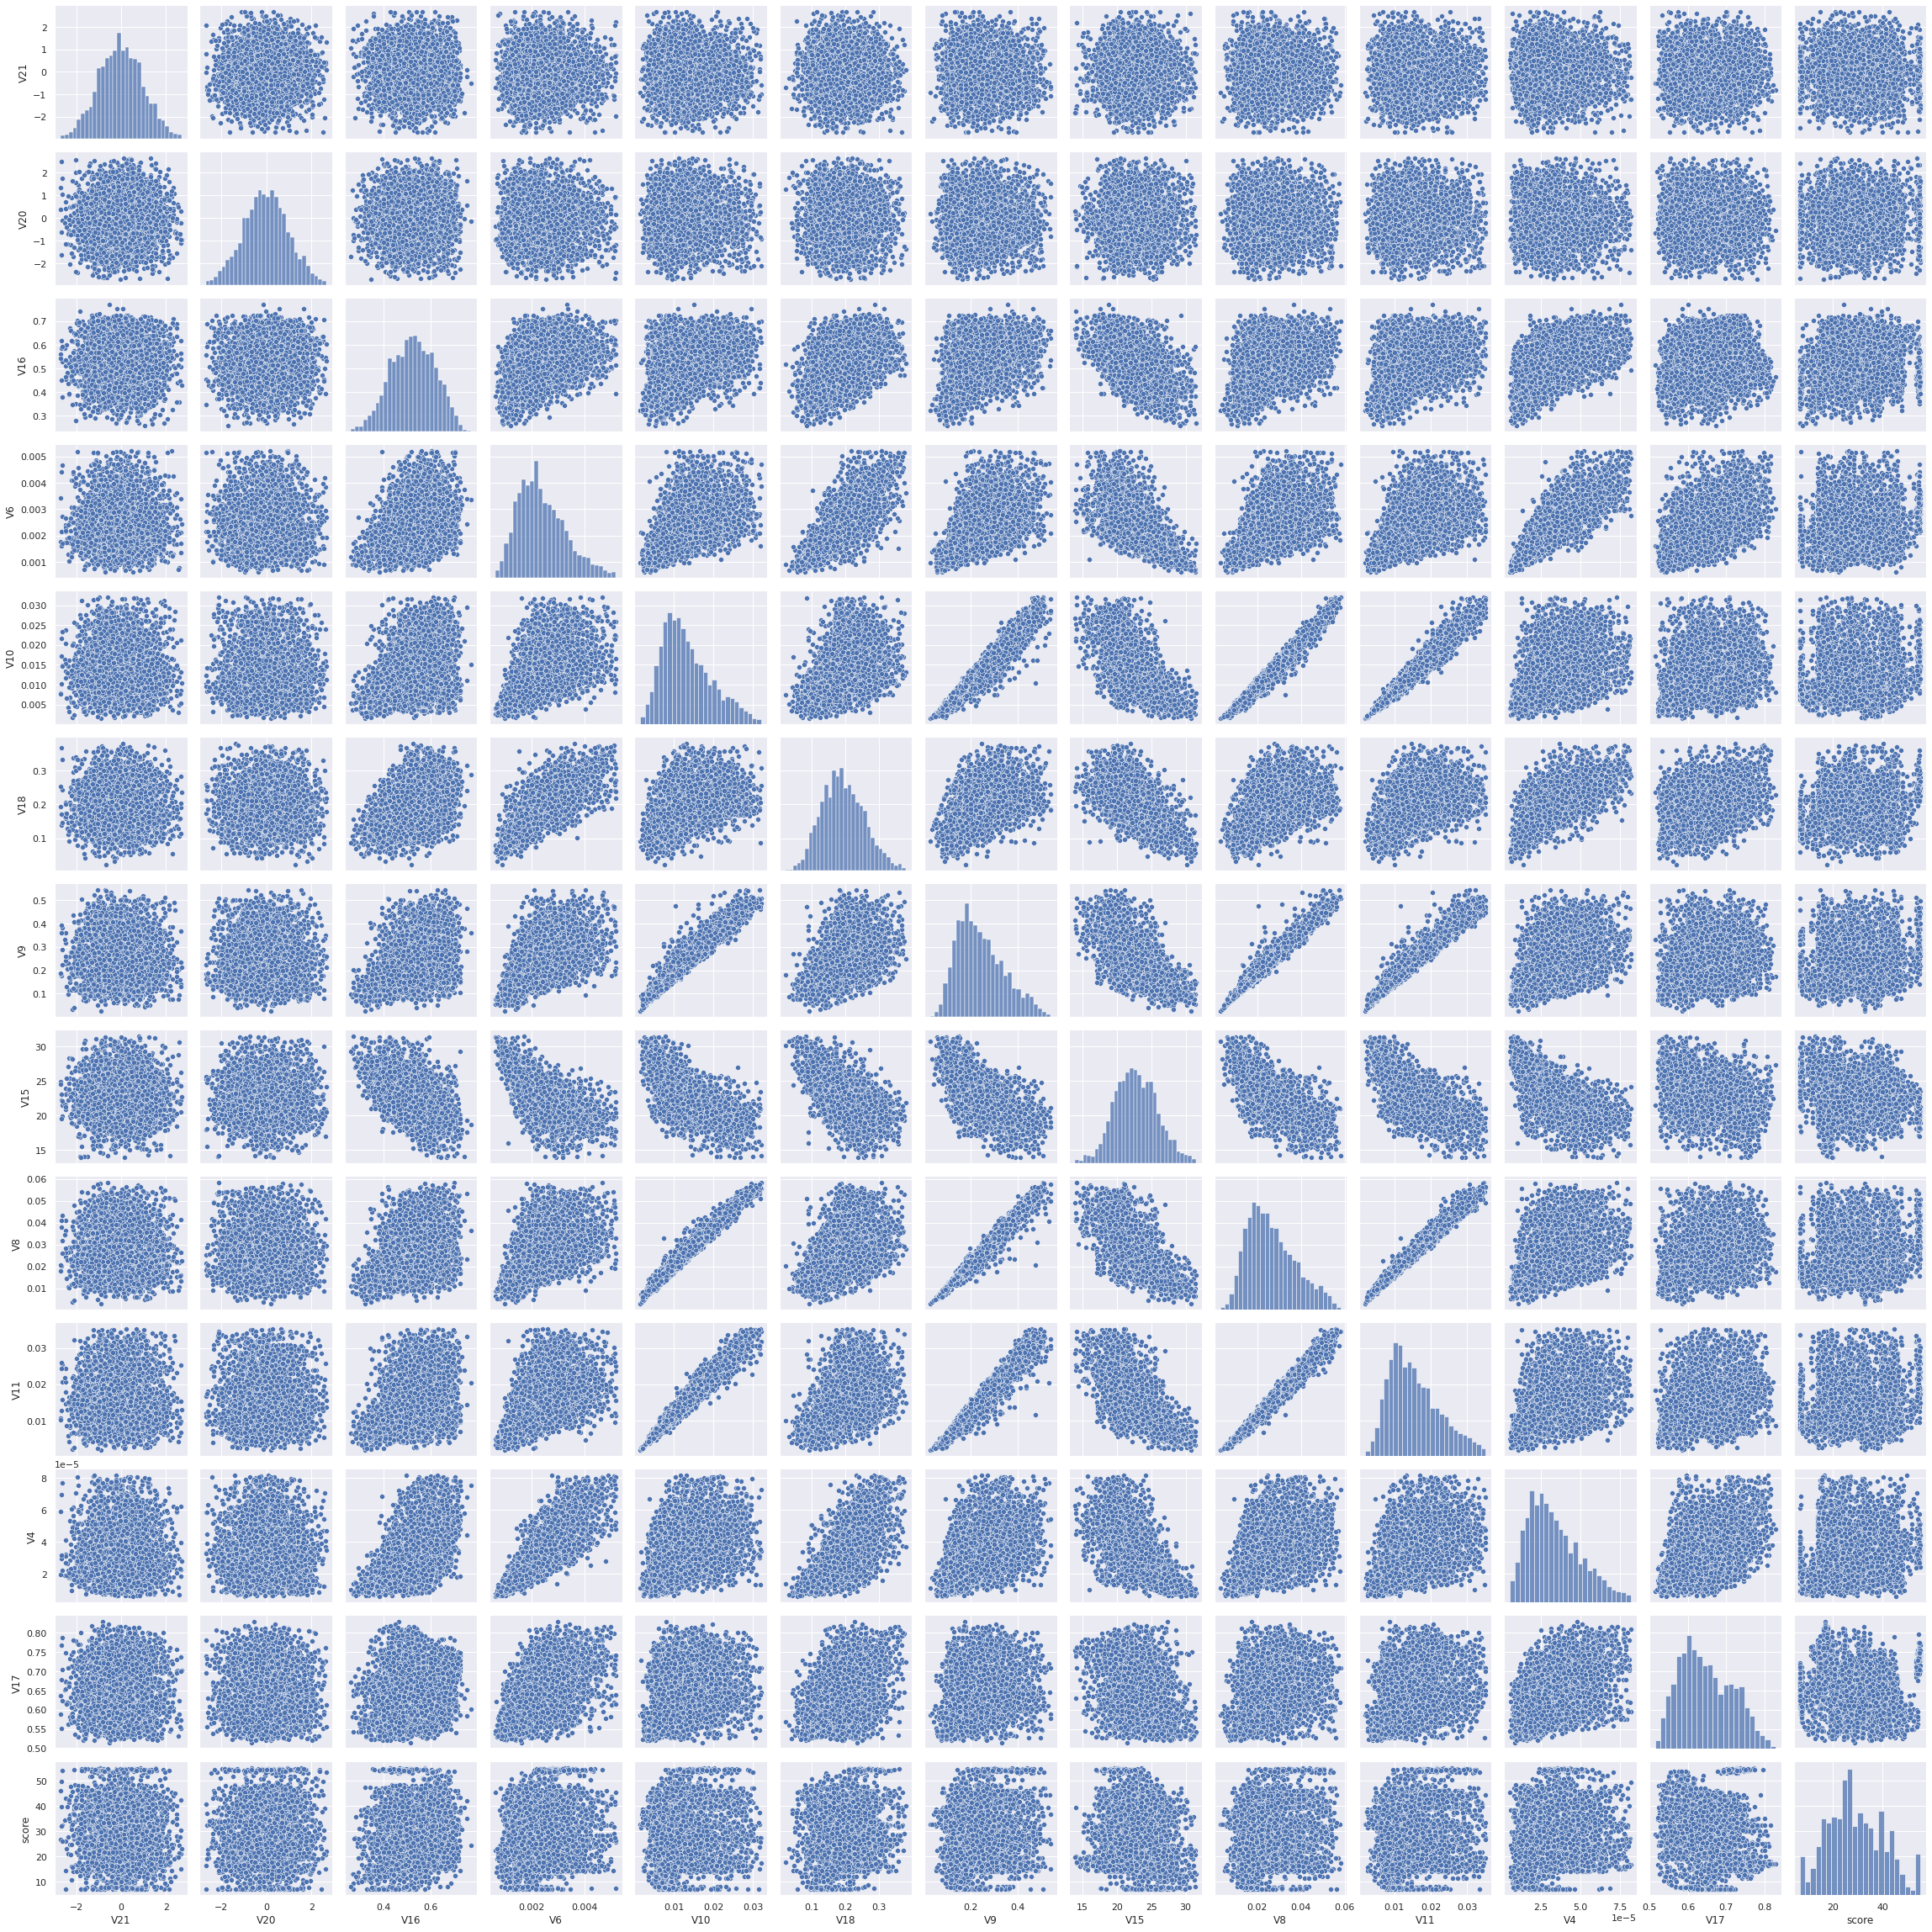

In [16]:
sns.pairplot(dados[(','.join(n_preditoras) + ',score').split(',')])
plt.show()

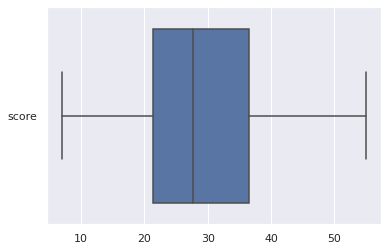

In [17]:
sns.boxplot(data=dfTrain[['score']], orient='h')


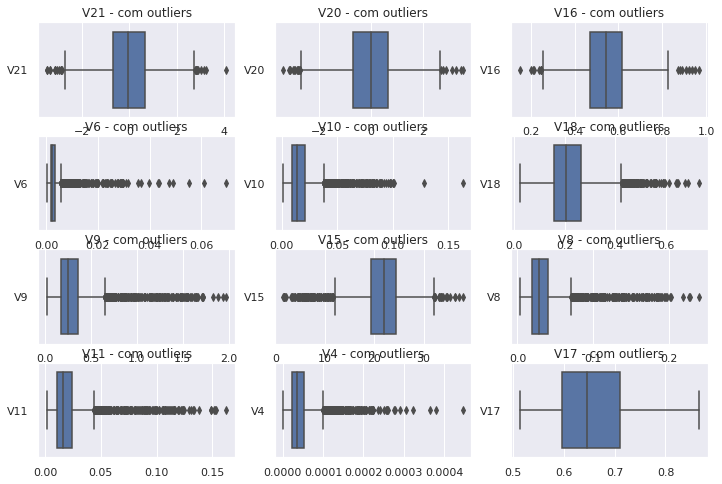

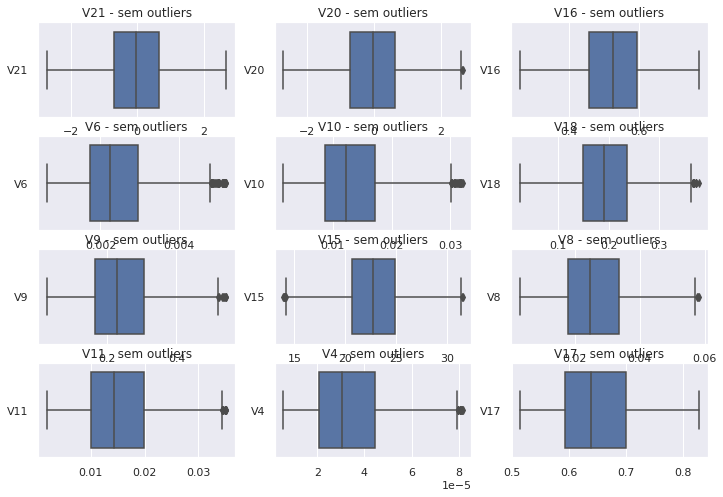

In [18]:
#box plot before remove outliers
imprimeBoxPlot(dfTrain, n_preditoras, 'com outliers')
#box plot after remove outliers outliers
imprimeBoxPlot(dados, n_preditoras, 'sem outliers')

(3346, 2)


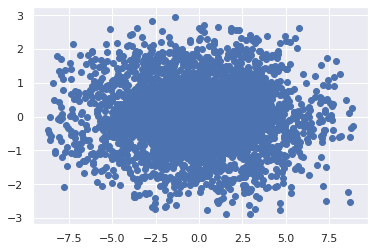

In [19]:

###########
# projecting data in 2D using PCA
###########
X = dados[n_preditoras]
pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(X)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])


In [20]:
#split train sample in two samples: X_treino and X_teste
X = dados[n_preditoras]
y = dados['score'].map(lambda x: np.log(x+ 0.01))
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [21]:
linreg = LinearRegression()
linreg.fit(X_treino, y_treino)
y_pred_linreg = linreg.predict(X_teste)
r2_linreg = r2_score(y_teste, y_pred_linreg)
print('R2:',r2_linreg)
mse_linreg = mean_squared_error(y_teste, y_pred_linreg)
print('MSE:',mse_linreg)
rmse_linreg = mean_squared_error(y_teste, y_pred_linreg, squared=False)
print('RMSE:',rmse_linreg)

R2: 0.10878986157024906
MSE: 0.16083788428001647
RMSE: 0.40104598773708794


In [22]:
# transform the data in a polynomial of degree = 3
transformer = PolynomialFeatures(degree=3, include_bias=False)
#x = X_treino.reshape((-1, 1))
transformer.fit(X_treino)
#print('Dados originais:\n', X_treino)

# transform the data creating new variables with cubic values
x_ = transformer.transform(X_treino)
x_t = transformer.transform(X_teste)
#print('Novos dados:\n', x_[0:1])

In [23]:
#train a Linear Regression model (polynomial regression)
model = LinearRegression().fit(x_, y_treino)
y_pred = model.predict(x_)

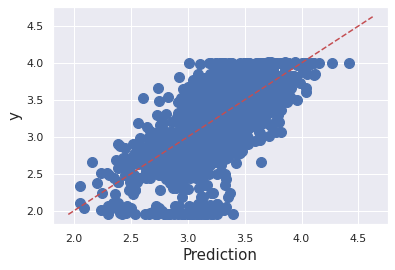

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_treino, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

#  print the score values with a perfect linear regression line 
xl = np.arange(min(y_treino), 1.2*max(y_treino),(max(y_treino)-min(y_treino))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

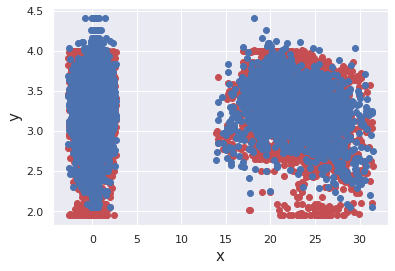

In [25]:
#compare the original score values with the predicted values in linear regression model (polynomial regression)
plt.plot(X_treino,y_treino, 'ro', label='Dados originais')
plt.plot(X_treino,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [26]:
#predict the polynomial regression for X_test and get mse, rmse
y_pred = model.predict(x_t)
MSE = mean_squared_error(y_teste, y_pred)
RMSE =  mean_squared_error(y_teste, y_pred, squared=False)
print('MSE:', MSE)
print('RMSE:', RMSE)


MSE: 0.1947092212863532
RMSE: 0.4412586784261055


Number of Estimators: 1 mse: 0.2519161125368848 rmse: 0.5019124550525568
Number of Estimators: 11 mse: 0.13333602892082363 rmse: 0.36515206273664075
Number of Estimators: 21 mse: 0.12614393110447591 rmse: 0.3551674690965882
Number of Estimators: 31 mse: 0.12385228818661269 rmse: 0.3519265380539136
Number of Estimators: 41 mse: 0.12386491080892403 rmse: 0.35194447120096095
Number of Estimators: 51 mse: 0.12342964008278579 rmse: 0.35132554715361336
Number of Estimators: 61 mse: 0.1234638746996765 rmse: 0.3513742658472252
Number of Estimators: 71 mse: 0.1236180969019096 rmse: 0.35159365310242674
Number of Estimators: 81 mse: 0.12330570435023888 rmse: 0.3511491198198265
Number of Estimators: 91 mse: 0.1233422955440951 rmse: 0.351201218027636
Melhor n: 81  com mse: 0.12330570435023888


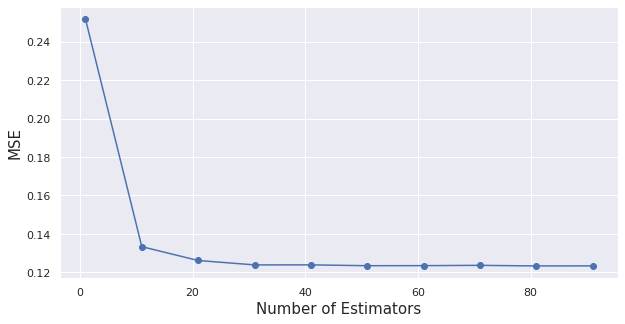

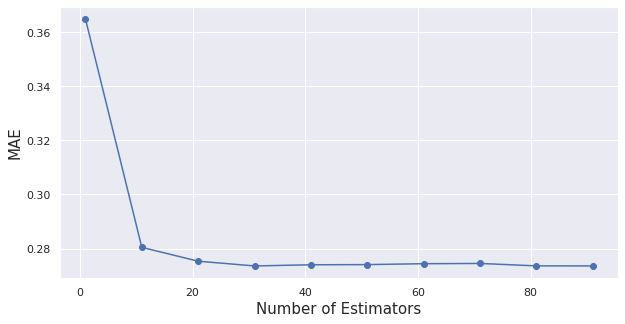

In [27]:
#simulating the best number of estimator for random forest
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = RandomForestRegressor(n_estimators=n, random_state= 12)
    model.fit(x_,y_treino)
    y_pred = model.predict(x_t) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

In [28]:
#training the model for the best_n value for estimator. Also getting mse, mae and rmse
modelRf = RandomForestRegressor(n_estimators=best_n, random_state=12)
modelRf.fit(x_,y_treino)
y_pred = modelRf.predict(x_t) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
rmse, mse, mae 


(0.3511491198198265, 0.12330570435023888, 0.2735859688060485)

In [29]:
#looking real value for score and predicted values (predito)  with random forest
pred = pd.DataFrame(y_pred, columns=['predito']).reset_index()
y = pd.DataFrame(y_teste).reset_index().drop(columns='index').reset_index()
res = pd.merge(pred, y, on='index', how='inner')
res.head(10)

index   predito     score
0      0  3.472580  3.791165
1      1  3.228739  3.189365
2      2  3.142334  3.288066
3      3  3.249408  3.464047
4      4  3.432095  3.670792
5      5  3.446499  3.345473
6      6  3.176923  3.617545
7      7  3.296635  3.555034
8      8  3.551201  3.566571
9      9  3.377743  3.433148

Number of Estimators: 1 mse: 0.27182910032476904 rmse: 0.5213723240878528
Number of Estimators: 11 mse: 0.13469558202912413 rmse: 0.36700896723257886
Number of Estimators: 21 mse: 0.12876002391006172 rmse: 0.3588314700664669
Number of Estimators: 31 mse: 0.12571585549255065 rmse: 0.3545643178501619
Number of Estimators: 41 mse: 0.12566616600536307 rmse: 0.3544942397350951
Number of Estimators: 51 mse: 0.12352859874184262 rmse: 0.3514663550638135
Number of Estimators: 61 mse: 0.12264626942114827 rmse: 0.35020889397779187
Number of Estimators: 71 mse: 0.12237268910556198 rmse: 0.34981808001525877
Number of Estimators: 81 mse: 0.12192472487866622 rmse: 0.3491772112819882
Number of Estimators: 91 mse: 0.12216251232922266 rmse: 0.34951754223389514
Melhor n: 81  com mse: 0.12192472487866622


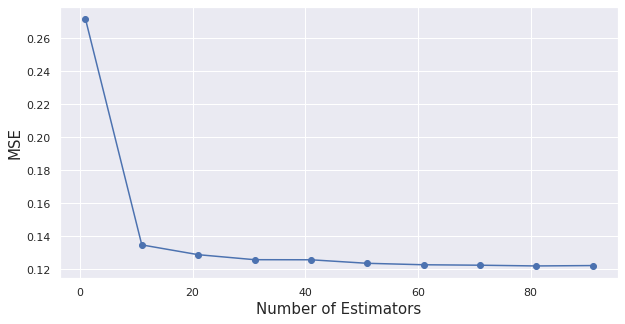

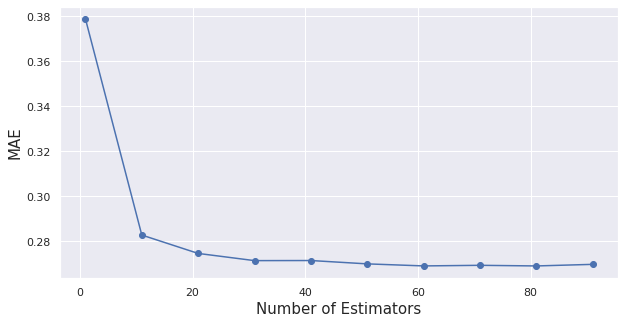

In [48]:
#simulating the best number of estimator for ExtraTreesRegressor
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = ExtraTreesRegressor(n_estimators=n, random_state= 123)
    model.fit(x_,y_treino)
    y_pred = model.predict(x_t) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

In [49]:
#training the model for the best_n value for estimator. Also getting mse, mae and rmse
modelETR = ExtraTreesRegressor(n_estimators=best_n, random_state=123, n_jobs = -1)
modelETR.fit(x_,y_treino)
y_pred = modelETR.predict(x_t) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
rmse, mse, mae 

(0.3491772112819882, 0.12192472487866622, 0.2690627534813335)

In [50]:
#transform test sample and predict with the best model
#the best model is modelETR because it got the lowest RMSE.
dfTest = pd.read_csv('test.csv')
X_teste = dfTest[n_preditoras]
x_teste = transformer.transform(X_teste)
y_pred = modelETR.predict(x_teste) 

In [51]:
#create a new dataframe with predicted values. Then, export it to a csv.
dfRes = pd.DataFrame()
dfRes['Id'] = dfTest['Id']
dfRes['Expected'] = np.exp(y_pred-0.01)
dfRes.to_csv('hed_result.csv', index=False)

In [46]:
#list the first lines of file.
!head hed_result.csv 

Id,Expected
1178,28.707851696759025
4954,19.685125376273575
1269,27.81753914882247
5269,28.55919243769468
143,27.1550887375064
2531,27.102232001693725
3219,22.72595008584495
967,31.8964586861842
4567,29.587535815434567
